# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 11/17/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 11/17/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,416,38928341,1.1
Albania,7679,2877800,266.8
Algeria,1626,43851043,3.7
Andorra,400,77265,517.7
Angola,435,32866268,1.3
Antigua and Barbuda,60,97928,61.3
Argentina,17785,45195777,39.4
Armenia,18221,2963234,614.9
Australia,18299,25459700,71.9


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Slovenia,46312,2078932,2227.7
Slovakia,118704,5459643,2174.2
Croatia,74168,4105268,1806.7
Austria,148912,9006400,1653.4
Georgia,62882,3989175,1576.3
Barbados,4071,287371,1416.6
Czechia,146987,10708982,1372.6
Belgium,149941,11492641,1304.7
Lithuania,33487,2722291,1230.1


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

11/13/21    5037039.0
11/14/21    5056242.0
11/15/21    5091200.0
11/16/21    5144827.0
11/17/21    5213193.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

11/4/21         NaN
11/5/21     33785.0
11/6/21     23788.0
11/7/21     12788.0
11/8/21     23714.0
11/9/21     41286.0
11/10/21    51077.0
11/11/21    48834.0
11/12/21    45356.0
11/13/21    34309.0
11/14/21    19203.0
11/15/21    34958.0
11/16/21    53627.0
11/17/21    68366.0
Name: Germany, dtype: float64

<AxesSubplot:>

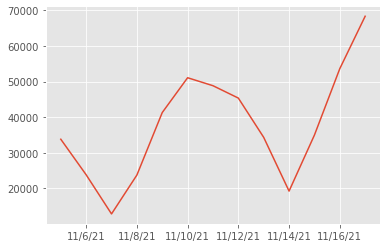

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

590.5728061119958